<a href="https://colab.research.google.com/github/juanfherrer/mi-primer-repositorio/blob/main/group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inteligencia Artificial Aplicada a Datos Empresariales en Quindío Colombia
## Misión 1 – Análisis Exploratorio y Preparación de Datos

**Curso:** Desarrollo de Proyectos con Aprendizaje de Máquina  
**Módulo:** Fase Inicial del Ciclo de Vida de un Proyecto de Machine Learning  
**Equipo de Trabajo:**  
- Juan Felipe Herrera  
- German Mejia  
- Joanna Cubides  

**Fecha de entrega:** 2025-04-21  

---

### 🎯 Objetivo General

# Proyecto de Aprendizaje de Máquina
Este proyecto tiene como objetivo explorar una base de datos de empresas de Armenia disponible en Datos Abiertos, aplicar análisis exploratorio de datos, imputar valores faltantes, normalizar datos y definir un posible problema de aprendizaje de máquina.

---

### 🧠 Habilidades trabajadas

- Programación en Python
- Estadística y matemáticas básicas
- Manejo de datos: limpieza, transformación y análisis

---

### 💡 Competencias

**Blandas:**
- Análisis de problemas
- Comunicación de resultados
- Trabajo en equipo

**Técnicas:**
- Preparación de datos para ML
- Ciclo de vida de un proyecto de aprendizaje de máquina
- Evaluación e interpretación de modelos



Pipeline inicial de limpieza y preparación del dataset que incluye:

Limpieza de valores nulos.

Conversión de tipos de datos.

Derivación de nuevas variables útiles.

Codificación de variables categóricas.

Dataset base para modelado (sin perder datos clave).


# Importación de librerías

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler


# URL del dataset JSON
url = "https://www.datos.gov.co/resource/rptq-q4rd.json"

# Cargar datos
df = pd.read_json(url)


In [3]:
df.head()

,matricula,razon_social,nit,fec_matricula,fec_renovacion,ult_ano_ren,dir_comercial,mun_comercial,tel_com_1,email_comercial,...,actividad,tam_empresa,tel_com_2,tel_com_3,ciiu_2,ciiu_3,fec_constitucion,rep_legal,nom_rep_legal,ciiu_4
0,99988,MONTOYA ZULUAGA WILLIAN DE JESUS,7.090337e+08,19990713,20190222,2019,CL. 17 NRO. 17-51,63001 - ARMENIA,7.465250e+06,william@gmail.com,...,CACHARRERIA,micro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,99904,SALDARRIAGA MARTINEZ CARLOS ALBERTO,1.732071e+08,19990709,20200206,2020,CALLE 24 18-41,63001 - ARMENIA,7.448600e+06,mallasdelquindio@hotmail.com,...,FABRICACIÓN DE MALLAS METÁLICAS POSTES PORTA...,micro,3.104206e+09,7.448300e+06,G4663 ** Comercio al por mayor de materiales d...,F4290 ** Construccion de otras obras de ingeni...,NaN,NaN,NaN,NaN
2,99845,ENLACES VIAJES Y TURISMO LIMITDA,8.010019e+09,19990708,20190320,2019,CARRERA 13A 1N-05 LC.3 EDF FUNDADORES,63001 - ARMENIA,7.452595e+06,ceocomercial@enlaces.viajes,...,NaN,micro,7.454597e+06,3.104525e+09,NaN,NaN,19990707.0,41896897.0,ISABEL CRISTINA ARIAS POSSO,NaN
3,99822,VILLADA ZEA MARIA DEL CARMEN,2.457472e+08,19990707,20200127,2020,CLL 38 28-33,63130 - CALARCA,3.206106e+09,misnochescalarca@gmail.com,...,VENTA DE LICOR,micro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99809,TOVAR REINA LUIS EFRAIN,5.937865e+07,19990707,20190322,2019,CL 12 NRO.17-43/49,63001 - ARMENIA,7.454630e+06,vidriosreinaarmenia@hotmail.com,...,COMERCIO DE VIDRIO,micro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   matricula         1000 non-null   int64  
 1   razon_social      1000 non-null   object 
 2   nit               988 non-null    float64
 3   fec_matricula     1000 non-null   int64  
 4   fec_renovacion    1000 non-null   int64  
 5   ult_ano_ren       1000 non-null   int64  
 6   dir_comercial     999 non-null    object 
 7   mun_comercial     999 non-null    object 
 8   tel_com_1         999 non-null    float64
 9   email_comercial   999 non-null    object 
 10  ciiu_1            999 non-null    object 
 11  actividad         833 non-null    object 
 12  tam_empresa       999 non-null    object 
 13  tel_com_2         392 non-null    float64
 14  tel_com_3         142 non-null    float64
 15  ciiu_2            311 non-null    object 
 16  ciiu_3            133 non-null    object 
 

## Visualización general

In [6]:
df.isna().sum()

,0
matricula,0
razon_social,0
nit,12
fec_matricula,0
fec_renovacion,0
ult_ano_ren,0
dir_comercial,1
mun_comercial,1
tel_com_1,1
email_comercial,1


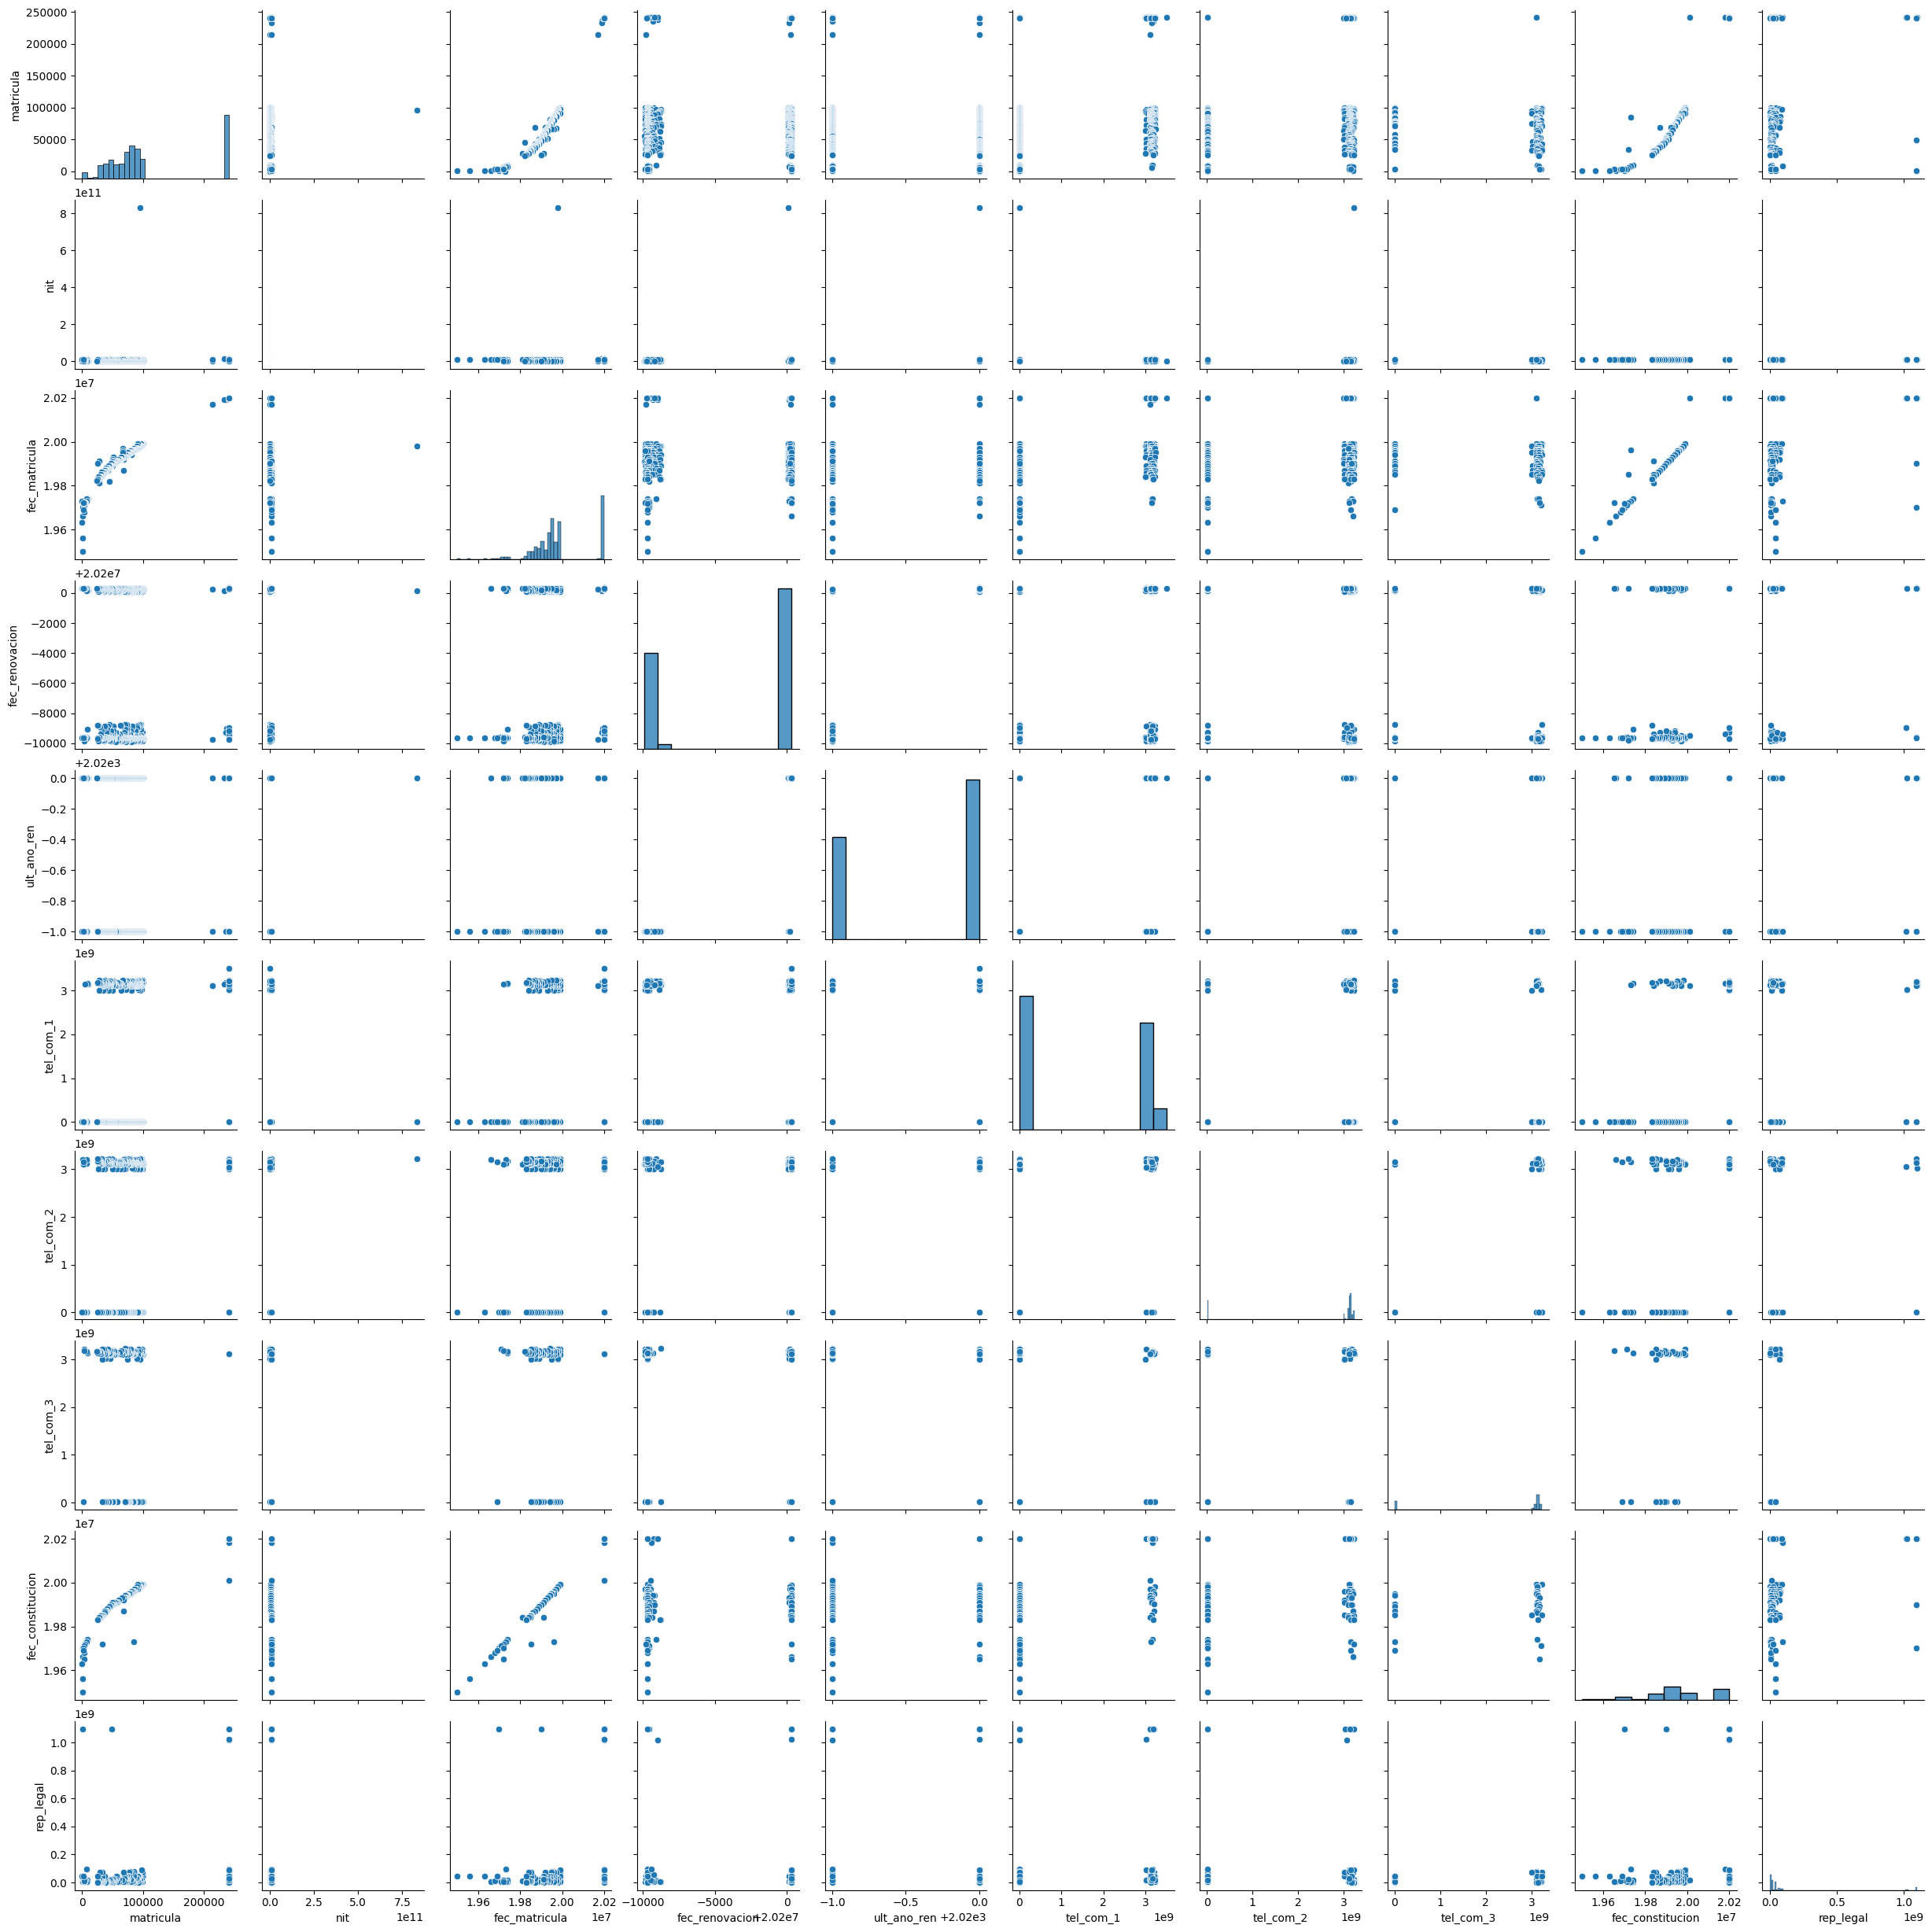

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

Análisis Exploratorio Inicial
  Dimensiones de Calidad de Datos

In [8]:
# Valores nulos por columna
df.isnull().sum()

,0
matricula,0
razon_social,0
nit,12
fec_matricula,0
fec_renovacion,0
ult_ano_ren,0
dir_comercial,1
mun_comercial,1
tel_com_1,1
email_comercial,1


In [9]:
# Porcentaje de datos faltantes
(df.isnull().sum() / len(df)) * 100

,0
matricula,0.0
razon_social,0.0
nit,1.2
fec_matricula,0.0
fec_renovacion,0.0
ult_ano_ren,0.0
dir_comercial,0.1
mun_comercial,0.1
tel_com_1,0.1
email_comercial,0.1


In [10]:
# Tipos de datos
df.dtypes

,0
matricula,int64
razon_social,object
nit,float64
fec_matricula,int64
fec_renovacion,int64
ult_ano_ren,int64
dir_comercial,object
mun_comercial,object
tel_com_1,float64
email_comercial,object


In [11]:
# Estadísticas generales
df.describe(include='all')


,matricula,razon_social,nit,fec_matricula,fec_renovacion,ult_ano_ren,dir_comercial,mun_comercial,tel_com_1,email_comercial,...,actividad,tam_empresa,tel_com_2,tel_com_3,ciiu_2,ciiu_3,fec_constitucion,rep_legal,nom_rep_legal,ciiu_4
count,1000.00000,1000,9.880000e+02,1.000000e+03,1.000000e+03,1000.000000,999,999,9.990000e+02,999,...,833,999,3.920000e+02,1.420000e+02,311,133,1.640000e+02,1.640000e+02,164,70
unique,NaN,1000,NaN,NaN,NaN,NaN,992,12,NaN,962,...,636,4,NaN,NaN,136,87,NaN,NaN,164,63
top,NaN,SOTO PUYO DIEGO ALEJANDRO,NaN,NaN,NaN,NaN,CARRERA 18 NRO. 49-20,63001 - ARMENIA,NaN,belgomez45@hotmail.com,...,TIENDA,micro,NaN,NaN,G4711 ** Comercio al por menor en establecimie...,G4771 ** Comercio al por menor de prendas de v...,NaN,NaN,ISABEL CRISTINA ARIAS POSSO,G4761 ** Comercio al por menor de libros peri...
freq,NaN,1,NaN,NaN,NaN,NaN,2,664,NaN,8,...,45,879,NaN,NaN,15,5,NaN,NaN,1,3
mean,109629.97000,NaN,3.217992e+09,1.999273e+07,2.019647e+07,2019.610000,NaN,NaN,1.540404e+09,NaN,...,NaN,NaN,2.545354e+09,2.410636e+09,NaN,NaN,1.997072e+07,1.038671e+08,NaN,NaN
std,77996.68887,NaN,2.664478e+10,1.305622e+05,4.789170e+03,0.487994,NaN,NaN,1.566744e+09,NaN,...,NaN,NaN,1.226630e+09,1.327612e+09,NaN,NaN,1.616863e+05,2.770925e+08,NaN,NaN
min,97.00000,NaN,1.314947e+06,1.950023e+07,2.019011e+07,2019.000000,NaN,NaN,7.310190e+06,NaN,...,NaN,NaN,7.107014e+06,7.313574e+06,NaN,NaN,1.950022e+07,1.591960e+05,NaN,NaN
25%,56369.50000,NaN,7.556261e+07,1.991083e+07,2.019040e+07,2019.000000,NaN,NaN,7.448319e+06,NaN,...,NaN,NaN,3.046688e+09,3.006136e+09,NaN,NaN,1.987794e+07,7.545396e+06,NaN,NaN
50%,82090.00000,NaN,2.457737e+08,1.996041e+07,2.020013e+07,2020.000000,NaN,NaN,7.584483e+06,NaN,...,NaN,NaN,3.122787e+09,3.117166e+09,NaN,NaN,1.995036e+07,1.925271e+07,NaN,NaN
75%,99812.25000,NaN,9.198298e+08,1.999071e+07,2.020031e+07,2020.000000,NaN,NaN,3.136955e+09,NaN,...,NaN,NaN,3.155883e+09,3.155950e+09,NaN,NaN,2.020030e+07,4.193174e+07,NaN,NaN


LIMPIEZA DE DATOS

In [12]:
# Quitar espacios y pasar a minúsculas para columnas categóricas relevantes
for col in ['razon_social', 'dir_comercial', 'mun_comercial', 'email_comercial', 'actividad', 'tam_empresa']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

In [13]:
# Eliminar registros con 'razon_social' duplicada (suponiendo que es identificador único) *Analizar
df = df.drop_duplicates(subset='razon_social')

In [14]:
# Completar valores faltantes básicos
df['tam_empresa'] = df['tam_empresa'].fillna("sin_dato")
df['actividad'] = df['actividad'].fillna("sin_dato")

In [15]:
# Rellenar valores nulos en ciiu con "ninguno"
for ciiu_col in ['ciiu_1', 'ciiu_2', 'ciiu_3', 'ciiu_4']:
    df[ciiu_col] = df[ciiu_col].fillna("ninguno")

In [16]:
# Rellenar teléfonos nulos con 0
for tel_col in ['tel_com_1', 'tel_com_2', 'tel_com_3']:
    df[tel_col] = df[tel_col].fillna(0)

 TRANSFORMACIONES DE FECHAS

In [17]:
# Convertir fechas desde entero tipo YYYYMMDD a datetime
for col in ['fec_matricula', 'fec_renovacion', 'fec_constitucion']:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = pd.to_datetime(df[col], format="%Y%m%d", errors='coerce')

In [18]:
# Derivar antigüedad en años desde la fecha de constitución
df['antiguedad_empresa'] = (pd.to_datetime("today") - df['fec_constitucion']).dt.days // 365
df['antiguedad_empresa'] = df['antiguedad_empresa'].fillna(0).astype(int)

In [19]:
# Derivar años sin renovar (si los hay)
df['anos_sin_renovar'] = 2025 - df['ult_ano_ren']

VARIABLES DERIVADAS Y PREPROCESADAS

In [20]:
# Número total de CIIUs reportados
df['num_ciius'] = df[['ciiu_1', 'ciiu_2', 'ciiu_3', 'ciiu_4']].apply(lambda x: x.ne("ninguno").sum(), axis=1)

In [21]:
# Tamaño de empresa como variable ordinal
tam_map = {'micro': 1, 'pequeña': 2, 'mediana': 3, 'grande': 4, 'sin_dato': 0}
df['tam_empresa_n'] = df['tam_empresa'].map(tam_map)

In [22]:
# Crear variable binaria: ¿tiene correo comercial?
df['tiene_email'] = df['email_comercial'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)

In [23]:
# Crear variable binaria: ¿tiene representante legal?
df['tiene_rep_legal'] = df['nom_rep_legal'].apply(lambda x: 0 if pd.isna(x) else 1)

In [24]:
# Codificar municipio (one-hot o label encoding, depende del uso)
df['mun_comercial'] = df['mun_comercial'].fillna("sin_dato")
df = pd.get_dummies(df, columns=['mun_comercial'], prefix='mun', drop_first=True)

In [25]:
# Selección de variables clave para modelado
features_modelo = [
    'antiguedad_empresa', 'anos_sin_renovar', 'num_ciius',
    'tam_empresa_n', 'tiene_email', 'tiene_rep_legal'
] + [col for col in df.columns if col.startswith('mun_')]

In [26]:
# Dataset base
df_modelo = df[features_modelo].copy()

In [27]:
print("Dataset base para modelado listo. Forma:", df_modelo.shape)

Dataset base para modelado listo. Forma: (1000, 18)


In essence, this code snippet prepares the data for modeling by:

Feature Selection: Identifying and selecting the most relevant features (columns) believed to be predictive for the machine learning task.
Dataset Creation: Creating a new dataset (df_modelo) consisting of only the selected features, ready to be used for training a machine learning model.

# Exploración de correlaciones entre las variables numéricas del dataset df_modelo.

Identificar relaciones lineales entre variables predictoras.

Detectar posibles redundancias.

Código para generar una matriz de correlación y un mapa de calor (heatmap):

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación entre variables numéricas
correlation_matrix = df_modelo.corr()



In [35]:
print(correlation_matrix)

                        antiguedad_empresa  anos_sin_renovar  num_ciius  \
antiguedad_empresa                1.000000          0.282720   0.124202   
anos_sin_renovar                  0.282720          1.000000   0.054928   
num_ciius                         0.124202          0.054928   1.000000   
tam_empresa_n                     0.539004          0.171032   0.063930   
tiene_email                            NaN               NaN        NaN   
tiene_rep_legal                   0.845187          0.199555   0.235439   
mun_63111 - buenavista           -0.011844         -0.025298  -0.018171   
mun_63130 - calarca              -0.038969          0.015039  -0.052995   
mun_63190 - circasia             -0.056231         -0.015532   0.041630   
mun_63212 - cordoba              -0.026537         -0.027614   0.038650   
mun_63272 - filandia             -0.053478         -0.055649   0.029908   
mun_63302 - genova               -0.031430         -0.067134   0.018920   
mun_63401 - la tebaida   

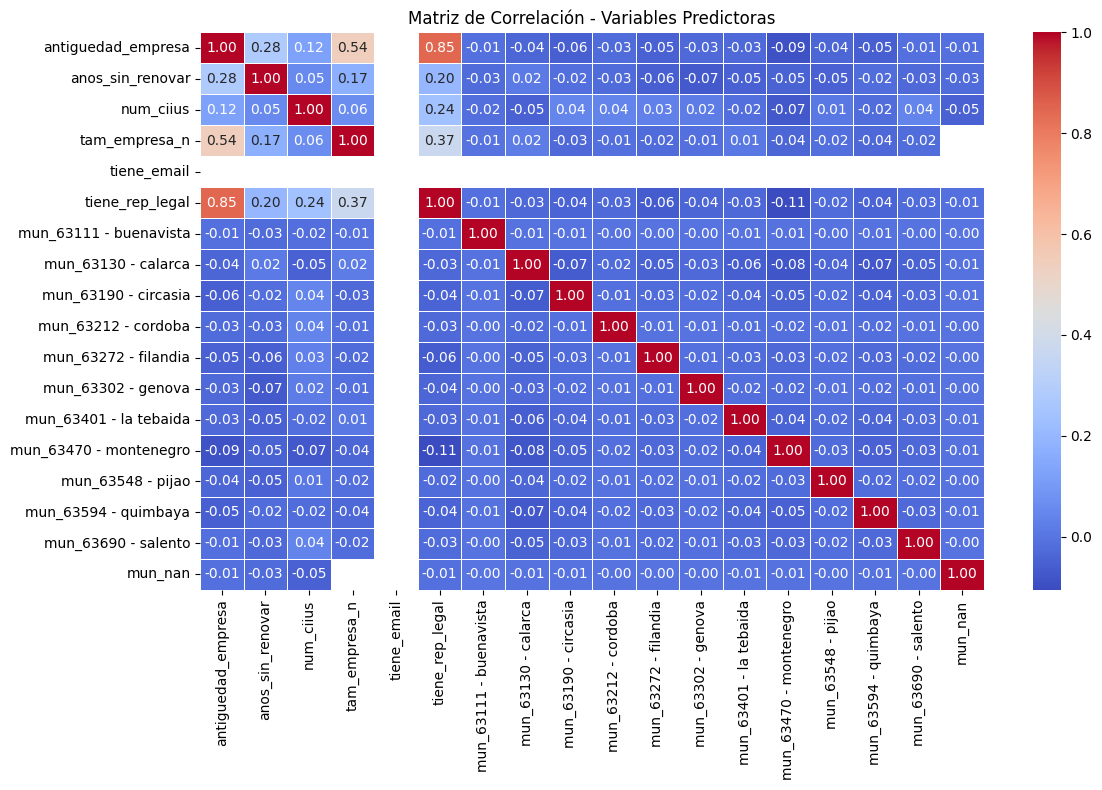

In [29]:
# Visualización con heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación - Variables Predictoras")
plt.tight_layout()
plt.show()


Imputación de valores faltantes con la media
Primero, realizaremos la imputación para todas las variables numéricas. Aquí está el código para ello:

In [30]:
from sklearn.impute import SimpleImputer

# Definimos el imputador con estrategia 'mean' (media)
imputer = SimpleImputer(strategy='mean')

In [31]:
# Aplicamos la imputación solo a las columnas numéricas
df_modelo_imputed = df_modelo.copy()
numerical_cols = df_modelo_imputed.select_dtypes(include=['float64', 'int64']).columns

In [32]:
# Imputamos los valores faltantes
df_modelo_imputed[numerical_cols] = imputer.fit_transform(df_modelo_imputed[numerical_cols])

In [33]:
# Verificamos que no haya más valores nulos
print(df_modelo_imputed.isnull().sum())

antiguedad_empresa        0
anos_sin_renovar          0
num_ciius                 0
tam_empresa_n             0
tiene_email               0
tiene_rep_legal           0
mun_63111 - buenavista    0
mun_63130 - calarca       0
mun_63190 - circasia      0
mun_63212 - cordoba       0
mun_63272 - filandia      0
mun_63302 - genova        0
mun_63401 - la tebaida    0
mun_63470 - montenegro    0
mun_63548 - pijao         0
mun_63594 - quimbaya      0
mun_63690 - salento       0
mun_nan                   0
dtype: int64


In [39]:
df_modelo_imputed.describe()

,antiguedad_empresa,anos_sin_renovar,num_ciius,tam_empresa_n,tiene_email,tiene_rep_legal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000
mean,4.511000,5.390000,1.513000,1.048835,1.0,0.164000
std,12.056419,0.487994,0.893661,0.293150,0.0,0.370461
min,0.000000,5.000000,0.000000,1.000000,1.0,0.000000
25%,0.000000,5.000000,1.000000,1.000000,1.0,0.000000
50%,0.000000,5.000000,1.000000,1.000000,1.0,0.000000
75%,0.000000,6.000000,2.000000,1.000000,1.0,0.000000
max,75.000000,6.000000,4.000000,3.000000,1.0,1.000000


# Objetivo

Construir un modelo de regresión lineal simple que prediga la antigüedad de una empresa (años) a partir de:

Los años sin renovar su matrícula,

El número de actividades económicas registradas,

Y el tamaño de la empresa (micro, pequeña, mediana, grande).

Este pipeline se enfocará en:

Preparar datos de forma limpia,

Ajustar el modelo,

Evaluar su desempeño,

Interpretar resultados para toma de decisiones empresariales.

In [41]:
df_model=df_modelo_imputed[['antiguedad_empresa', 'anos_sin_renovar', 'num_ciius', 'tam_empresa_n']]

In [43]:
# Vista preliminar
df_model.head()

,antiguedad_empresa,anos_sin_renovar,num_ciius,tam_empresa_n
0,0.0,6.0,1.0,1.0
1,0.0,5.0,3.0,1.0
2,25.0,6.0,1.0,1.0
3,0.0,5.0,1.0,1.0
4,0.0,6.0,1.0,1.0


In [45]:
# Revisar nulos
print(df_model.isnull().sum())

antiguedad_empresa    0
anos_sin_renovar      0
num_ciius             0
tam_empresa_n         0
dtype: int64


# Estandarización de las variables predictoras

In [46]:
# Definimos X y Y
X = df_model[['anos_sin_renovar', 'num_ciius', 'tam_empresa_n']]
y = df_model['antiguedad_empresa']

In [47]:
# Escalar X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos

In [48]:
# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Entrenamiento del modelo de regresión lineal

In [49]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluación del modelo

In [50]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Raíz del error cuadrático medio (RMSE): {rmse:.2f}')
print(f'Coeficiente de determinación (R²): {r2:.2f}')


Error cuadrático medio (MSE): 132.25
Raíz del error cuadrático medio (RMSE): 11.50
Coeficiente de determinación (R²): 0.16


# Interpretación de coeficientes

In [51]:
# Coeficientes del modelo
coeficientes = pd.DataFrame(model.coef_, index=['anos_sin_renovar', 'num_ciius', 'tam_empresa_n'], columns=['Coeficiente'])
print(coeficientes)

                  Coeficiente
anos_sin_renovar     2.703962
num_ciius            1.305528
tam_empresa_n        4.730048


# Visualización de resultados

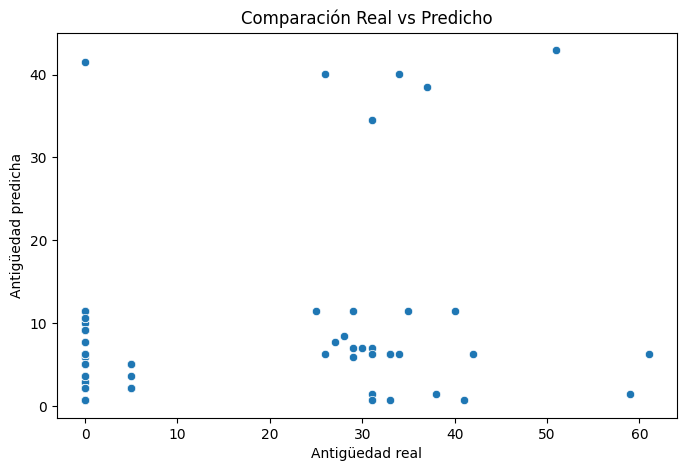

In [52]:
# Gráfica real vs predicho
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Antigüedad real')
plt.ylabel('Antigüedad predicha')
plt.title('Comparación Real vs Predicho')
plt.show()